###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2015 Teng Long

 # The Dynamic Structure Analysis based on Numerical Method

## 1.Introduction:

The project comes from a real physical phenomenon. We use cars everyday. When a car is running on a rough road, we may feel uncomfortable because of the vibration of car body.The suspension is the most important link between the ground and the car body structure and the mechanical property of the suspension determines the riding comfortability. 

If you are still confused about that, you can watch the video below:

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('EbkWaNDyFOQ')

At 3:00, the interesting video shows an experiment related to the damping property of the suspension affecting the performance of the car.

Thus, an academic simulation needs to be done to make clear what effects the riding comfortabiltity.

For the project, the Numerical Method(Euler's Method) combined with the Finite Element Method was used to simulate the
real physical phenomenon.

The structure was modeled by Finite Element Method and the equations were solved by numerical method.

The picture below is the structure modeled by Finite Element Method. You can see that I have 12 nodes, each of which has three degree of freedoms X, Y, Z and a Load(1N), which are appled on the y direction of node 4, 5, 11, 12:

![Image](./figures/F1.png)
#### Figure 1. To simplify the model, only two elements were used


Equation One(Newton's Law) [1]:
\begin{equation}
 M  \ddot{U}(t)+C \dot{U}(t)+K U(t)= F(t)  \quad \quad\quad (1)
\end{equation}

Note:

1.The equation does not have the damping coefficient C and indicates the material is purely elastic. The "elastic" means there is no dissipation property in structure and at any point the material has the potential to return to its original place.

2.The equation has damping coefficient C and it indicates the material is a viscoelastic solid. The "Visco" is damping property.

***Physical explanation***: If we suddenly sit in a car and the suspension of the car has the damping coefficient(C), we can feel the car vibrate, the amplitude of the vibration will decrease gradually, and the car  will eventually stop vibrating.  Because of the damping coefficient (C), the damping property of the suspension can damp out the energy. 

The video above at time  16:00  shows the phenomenon and the solution.

Equation two(Newton's Law) [1]:
    
\begin{equation}
M  \ddot{U}(t)+K U(t)= F(t)\quad \quad\quad(2)
\end{equation}



***Physical explanation***: If we suddenly sit in a car and the suspension of the car without the property damping coefficient(C), theoritically, the car will not stop vibrating. That means the enery is conserved.

The video above at 12:00  shows the phenomenon and the solution.

## 2.Euler Method:
The method is the basic method in the numerial method and the specific introduction can be found at the website(https://en.wikipedia.org/wiki/Euler_method)

Also you can watch the video below:

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('RGtCw5E7gBc')

#### The Equation in Eurler Method [2]

\begin{equation}
F_{n}=\frac{\partial U_{n}}{\partial t}\quad \quad\quad(3)
\end{equation}

\begin{equation}
U_{n+1}=U_{n}+dt \cdot F_{n}\quad \quad\quad(4)
\end{equation}

Specifically, ***for the structure with the damping property C***, to use the numerical method, the dynamic equation can be processed in the following way [1]:

\begin{equation}
    \dot{U}(t)=V(t)\quad \quad\quad(5)\\
    \dot{V}(t)=M^{-1}(F-KU(t)-CV(t))\quad \quad\quad(6)
\end{equation}   


The matrix form:
\begin{align}
\frac{\partial }{\partial t}&
\begin{pmatrix} U \\V \end{pmatrix}
= \begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix}&\begin{pmatrix} U \\V \end{pmatrix}&
+\begin{pmatrix} \ 0  \\ M^{-1}F\   \end{pmatrix}\quad \quad\quad(7)
\end{align}

In addition, ***for a structure without the damping property***, we just let the C become a zero matrix.

## 3.The Finite Element Method 

###  The Dynamic Equation(Newton's Law):

\begin{equation}
Newton's \quad Law [1]-->          M  \ddot{U}(t)+C \dot{U}(t)+K U(t)= F(t)\quad \quad\quad(12)
\end{equation}

Note: 
1. M is the mass of structure, C is  damping property of the structure, K is the stiffness of structure.

2. The equation has damping coefficient C and it indicates the material is a viscoelastic solid. Specifically, "Visco" is damping property.

The Mass Matrix [1]:
\begin{equation}
M_{\alpha \beta}=\int_{\text{v}}\rho \ N_{i\alpha} N_{i\beta}dV[1]\quad \quad\quad(13)
\end{equation}

The Damping Matrix [1]:
\begin{equation}
C_{\alpha \beta}=\int_{\text{v}}a_{ijmn} \ B_{ij\alpha} B_{mn\beta}dV\quad \quad\quad(14)
\end{equation}

The Stiffness Matrix [1]:
\begin{equation}
K_{\alpha \beta}=\int_{\text{v}}A_{ijmn} \ B_{ij\alpha} B_{mn\beta}dV\quad \quad\quad(15)
\end{equation}

The relation between the displacement and the strain [1]:

\begin{equation}
B_{ija}=\frac{\partial B_{i\alpha}}{\partial \xi_{k}}\frac{\partial \xi_{k}}{\partial X_{j}}\quad \quad\quad(16)
\end{equation}


The Jacobin Matrix [1]:
\begin{equation}
Jacobin=\frac{\partial \xi_{k}}{\partial X_{j}}\quad \quad\quad(17)
\end{equation}

The Shape Funtion [1]:

\begin{equation}
N1=(1-r)(1-s)(1+t)/8
\end{equation}
\begin{equation}
N2=(1+r)(1-s)(1+t)/8
\end{equation}
\begin{equation}
N3=(1+r)(1+s)(1+t)/8
\end{equation}
\begin{equation}
N4=(1-r)(1+s)(1+t)/8
\end{equation}
\begin{equation}
N5=(1-r)(1-s)(1-t)/8
\end{equation}
\begin{equation}
N6=(1+r)(1-s)(1-t)/8
\end{equation}
\begin{equation}
N7=(1+r)(1+s)(1-t)/8
\end{equation}
\begin{equation}
N6=(1-r)(1+s)(1-t)/8
\end{equation}

**Shape Function** is the the bridge between the natrue coordinate r,s t and the physical coordinate x,y,z. For this hexahedron & 8 nodes shape function, with the shape function we can map any hexahedron to the nature coordinate. In this way, the integration range in nature coordinate is always from -1 to 1.

How we can discrete the displacement by the eight nodes:

Matrix Form [1]:

\begin{align}
\begin{pmatrix} X \\ Y \\ Z  \end{pmatrix} =
&  \begin{pmatrix}
N1\ 0\ 0\ N2\ 0\ 0\ N3\ 0\ 0\ N4\ 0\ 0\ N5\ 0\ 0\ N6\ 0\ 0\ N7\ 0\ 0\ N8\ 0\ 0\\0\ N1\ 0\ 0\ N2\ 0\ 0\ N3\ 0\ 0\ N4\ 0\ 0\ N5\ 0\ 0\ N6\ 0\ 0\ N7\ 0\ 0\ N8\ 0\\0\ 0\ N1\ 0\ 0\ N2\ 0\ 0\ N3\ 0\ 0\ N4\ 0\ 0\ N5\ 0\ 0\ N6\ 0\ 0\ N7\ 0\ 0\ N8
\end{pmatrix}&* \begin{pmatrix} X1\\ Y1\\ Z1\\ X2\\ Y2\\ Z2\\ X3\\ Y3\\ Z3\\ X4\\ Y4\\ Z4 \\ X5\\ Y5\\ Z5\\ X6\\ Y6\\ Z6\\ X7\\ Y7\\ Z7\\ X8\\ Y8\\ Z8\end{pmatrix}.
\end{align}

Summation Form[1]:

$$X_{i}=\sum_{\alpha=1}^{24} N_{i\alpha}X_{\alpha}\quad \quad\quad(11)$$
$$Y_{i}=\sum_{\alpha=1}^{24} N_{i\alpha}Y_{\alpha}\quad \quad\quad(12)$$
$$Z_{i}=\sum_{\alpha=1}^{24} N_{i\alpha}Z_{\alpha}\quad \quad\quad(13)$$

We can expand the summation form:

==>
\begin{equation}
X=N1*X1+N2*X2+N3*X3+N4*X4+N5*X5+N6*X6+N7*X7+N8*X8
\end{equation}
\begin{equation}
Y=N1*Y1+N2*Y2+N3*Y3+N4*Y4+N5*Y5+N6*Y6+N7*Y7+N8*Y8
\end{equation}
\begin{equation}
Z=N1*Z1+N2*Z2+N3*Z3+N4*Z4+N5*Z5+N6*Z6+N7*Z7+N8*Y8
\end{equation}

Jacobin Matrix [1]:

\begin{align}
J& = \begin{pmatrix} \frac{\partial X}{\partial r} \ \frac{\partial Y}{\partial r}\ \frac{\partial Z}{\partial r} \\  \frac{\partial X}{\partial s} \ \frac{\partial Y}{\partial s}\ \frac{\partial Z}{\partial s}\\   \frac{\partial X}{\partial t} \ \frac{\partial Y}{\partial t}\ \frac{\partial Z}{\partial t}\end{pmatrix}
\end{align}

###  The Process of how we use the Linear monentum equation to derive the Finite Element equations:

The linear momentum [1]:
\begin{equation}
\rho \ddot{u}_{i} -\rho \ f_{i} -t_{ji,j}=0\quad \quad\quad(14)
\end{equation}

####  Apply the virtual displacement to the equilibrium equation  [1]:
\begin{equation}
\int_{\text{v}}    (t_{ji,j}+\rho \ f_{i} -\rho \ddot{u}_{i})  \delta\ u_{i}    dV=0\quad \quad\quad(15)
\end{equation}

####  Process the last term [1]:

\begin{equation}
\int_{\text{v}}    \rho \ f_{i} \delta\ u_{i}    dV\quad \quad\quad(16)
\end{equation}

\begin{equation}
\delta\ u_{i} = \ N_{i\alpha}\delta \ U_{\alpha}   \quad \quad\quad(17)
\end{equation}


\begin{equation}
\int_{\text{v}}    \rho\ f_{i} \delta\ u_{i}    dV
=\int_{\text{v}}    \rho\ f_{i} \ N_{i\alpha}\delta \ U_{\alpha}    dV
=\delta \ U_{\alpha}\int_{\text{v}}    \rho\ f_{i} \ N_{i\alpha}    dV
=\delta \ U_{\alpha}\ F_{\alpha}^1\quad \quad\quad(18)
\end{equation}

\begin{equation}
\int_{\text{v}}    \rho\ f_{i} \ N_{i\alpha}    dV
=\ F_{\alpha}^1\quad \quad\quad(19)
\end{equation}

#### Process the second term [1]:
\begin{equation}
\int_{\text{v}}  \rho \ddot{u}_{i} \delta\ u_{i} dV\quad \quad\quad(20)
\end{equation}

\begin{equation}
\ddot{u} = \ N_{i \beta} \delta \ U_{\beta}   \quad \quad\quad(21)
\end{equation}

\begin{equation}
\delta \ u_{i}=N_{i\alpha}\delta \ U_{\alpha}   \quad \quad\quad(22)
\end{equation}


\begin{equation}
\int_{\text{v}}  \rho \ddot{u}_{i} \delta\ u_{i} dV
=\int_{\text{v}}    \rho\ N_{i\beta}\ddot{U}_{\beta} \ N_{i\alpha}\delta \ U_{\alpha}    dV
= \delta \ U_{\alpha}\ddot{U}_{\beta}\int_{\text{v}}   \rho\ N_{i\beta}\  N_{i\alpha}    dV
=\delta \ U_{\alpha}\ddot{U}_{\beta}\ M_{\alpha\beta}\quad \quad\quad(23)
\end{equation}


\begin{equation}
\int_{\text{v}}   \rho\ N_{i\beta}\  N_{i\alpha}    dV
=\ M_{\alpha\beta}\quad \quad\quad(24)
\end{equation}

#### Process the first term [1]:

\begin{equation}
\int_{\text{v}}    t_{ji,j} \delta\ u_{i}    dV
=\int_{\text{v}}    (t_{ji,j} \delta\ u_{i})_{,j}-\ t_{ji,j} (\delta \ u_{i})_{,j} dV\\
=\oint_{\text{v}}   t_{ji,j} \delta\ u_{i}\ n_{j}dS- \int_{\text{v}}\ t_{ji} \delta \ e_{ij} dV\\
=\oint_{\text{sa}}   t_{ji,j} \ n_{j}  \delta\ u_{i} dS
+\oint_{\text{sb}}   t_{ji,j} \ n_{j}  \delta\ u_{i} dS
-\int_{\text{v}}   t_{ji} \delta \ e_{ij} dV\\
=\oint_{\text{sa}}   t_{ji,j} \ n_{j}  \delta\ u_{i} dS
-\int_{\text{v}}   t_{ji} \delta \ e_{ij} dV\\
=\oint_{\text{sa}}   t_{i}^*  \delta\ u_{i} dS
- \delta\ N_{\alpha} \int_{\text{v}} \ t_{ij}\ B_{ij\alpha} dV\\
=\oint_{\text{sa}}   t_{i}^*  \ N_{i\alpha}\delta\ U_{\alpha} dS
- \delta\ N_{\alpha} \int_{\text{v}} \ t_{ij}\ B_{ij\alpha} dV\\
=\delta\ U_{\alpha}\oint_{\text{sa}}   t_{i}^*  \ N_{i\alpha}  dS
- \delta\ N_{\alpha} \int_{\text{v}} \ t_{ij}\ B_{ij\alpha} dV\\
=\delta\ U_{\alpha}\ F_{\alpha}^2-\delta\ U_{\alpha}\ F_{\alpha}^3\quad \quad\quad(25)
\end{equation}

\begin{equation}
F_{\alpha}^2 \quad is \quad due \quad to \quad surface \quad traction
\end{equation}
\begin{equation}
F_{\alpha}^3 \quad is \quad due \quad to \quad internalaction
\end{equation}

The detail: parameter relation for the equation above [1]:

\begin{equation}
u_{i,j}=B_{ij\alpha}U_{\alpha}\quad \quad\quad(26)
\end{equation}
\begin{equation}
e_{ij}=0.5(B_{ij\alpha}+B_{ij\alpha})U_{\alpha}\quad \quad\quad(27)
\end{equation}
\begin{equation}
t_{ji} \delta\ e_{ij}=t_{ji} \delta\ u_{i,j}\quad \quad\quad(28)
\end{equation}
\begin{equation}
t_{ji} \delta\ e_{ij}=t_{ij} \ B_{ij\alpha}\delta\ U_{\alpha}\quad \quad\quad(29)
\end{equation}
\begin{equation}
e_{mn} =B_{mn\beta}\ U_{\beta}\quad \quad\quad(30)
\end{equation}
\begin{equation}
\dot{e}_{mn} =B_{mn\beta}\ \dot{U}_{\beta}\quad \quad\quad31)
\end{equation}

Note: we use the small strain theory [1]:
\begin{equation}
e_{ij}=0.5(u_{i,j}+u_{j,i})\quad \quad\quad(32)
\end{equation}




Stress:the first term is initial stress, the second term is the thermal stress, the forth term is elastic stress and the last term is the damping stress [1]:
\begin{equation}    
t_{ij}=\alpha_{ji}+ \beta_{ji}T+A_{jimn}e_{mn}+a_{jimn}\dot{e}_{mn}\quad \quad\quad(33)
\end{equation}

Now we can get the discreted form internalaction [1]:

\begin{equation}   
F_{\alpha}^3=\int_{\text{v}}   t_{ij}\ B_{ij\alpha}    dV=
\int_{\text{v}}   \alpha_{ij}\ B_{ij\alpha}    dV
-T_{q}\int_{\text{v}}  \beta_{ji} \ N_{q}\ B_{ij\alpha} dV
+U_{ \beta} \int_{\text{v}}  A_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV
+U_{ \beta} \int_{\text{v}}  a_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV\\
=F_{\alpha}^4-T_{q}P_{\alpha q}+U_{\beta}K_{\alpha\beta}+\dot{U}_{\beta}C_{\alpha\beta}\quad \quad\quad(34)
\end{equation}

Specifically [1]:

\begin{equation} 
\int_{\text{v}}   \alpha_{ij}\ B_{ij\alpha}    dV=F_{\alpha}^4
\end{equation}
\begin{equation} 
\int_{\text{v}}  \beta_{ji} \ N_{q}\ B_{ij\alpha} dV=P_{\alpha q}
\end{equation}
\begin{equation} 
\int_{\text{v}}  A_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV=K_{\alpha\beta}
\end{equation}
\begin{equation} 
\int_{\text{v}}  a_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV=C_{\alpha\beta}
\end{equation}



The discrete form of initial stress [1]:
\begin{equation} 
\int_{\text{v}}   \alpha_{ij}\ B_{ij\alpha}    dV=F_{\alpha}^4
\end{equation}

The discrete form of thermal stress [1]:
\begin{equation} 
\int_{\text{v}}  \beta_{ji} \ N_{q}\ B_{ij\alpha} dV=P_{\alpha q}
\end{equation}

The discrete form of elastic stress [1]:
\begin{equation} 
\int_{\text{v}}  A_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV=K_{\alpha\beta}
\end{equation}

The discrete form of damping stress  [1]:
\begin{equation} 
\int_{\text{v}}  a_{jimn}\  B_{ij\alpha}\ B_{mn\beta}dV=C_{\alpha\beta}
\end{equation}

As a reuslt [1]:
\begin{equation}     
F_{\alpha}^3=F_{\alpha}^4-T_{q}P_{\alpha q}+U_{\beta}K_{\alpha\beta}+\dot{U}_{\beta}C_{\alpha\beta}\quad \quad\quad(35)
\end{equation}    

####   The process of hwo we get the final Finite Element Method equation, which we can use to make a program [1]:
\begin{equation}   
\delta\ U_{\alpha}\ F_{\alpha}^1+\delta\ U_{\alpha}\ \ddot{U}_{\beta}\ M_{\alpha\beta}+
\delta\ U_{\alpha}\ F_{\alpha}^2-\delta\ U_{\alpha}\ F_{\alpha}^3=0\quad \quad\quad(36)
\end{equation}


\begin{equation}   
\delta\ U_{\alpha} (M_{\alpha\beta}\ddot{U}_{\beta}+\ F_{\alpha}^3-\ F_{\alpha}^1-\ F_{\alpha}^2)=0
\end{equation}

\begin{equation}   
M_{\alpha\beta}\ddot{U}_{\beta}+\ F_{\alpha}^3-\ F_{\alpha}^1-\ F_{\alpha}^2=0
\end{equation}

\begin{equation}   
M_{\alpha\beta}\ddot{U}_{\beta}+\ F_{\alpha}^3=\ F_{\alpha}^1+\ F_{\alpha}^2
\end{equation}

Mass Matrix [1]:
\begin{equation}   
M_{\alpha\beta}\ddot{U}_{\beta} 
\end{equation}

Internal Internaction [1]
\begin{equation}   
F_{\alpha}^3 
\end{equation}


Body Force [1]
\begin{equation}   
F_{\alpha}^1
\end{equation}

Surface Traction [1]
\begin{equation}   
F_{\alpha}^2
\end{equation}


\begin{equation}   
M_{\alpha\beta}\ddot{U}_+ C_{\alpha\beta}\dot{U}_{\beta}+ K_{\alpha\beta}U_{\beta}=T_{q}P_{\alpha q}-\ F_{\alpha}^4+  \ F_{\alpha}^1+\ F_{\alpha}^2\quad \quad\quad(37)
\end{equation}



## 4.  Now let us do the coding!



In [4]:
import numpy
from sympy import Symbol
from sympy import sympify
from matplotlib import pyplot  
%matplotlib inline
#init_printing(use_unicode=True)

##### The Function "NewWayToAss" works to assemble the single matrix including Stiffness Matrix, Mass Matrix, Damping Matrix into a global Stiffness Matrix, Mass Matrix, Damping Matrix.

In [5]:

def NewWayToAss(K1,S):    
      
    """ Construct the global stiffness Matrix
    
    Parameters:
    ----------
    S:  connectivity matrix ( input )
    K1: single stiffnes atrix ( input )    
        
    Returns:
    -------
    KK1:  single stiffness matrix in the global stiffness matrix
    
    """      
    
    KK1=zeros(36,36)
    
    for i in range(24):    
    
       for j in range(24) :
            a=S[i]
            b=S[j]
            c=K1[i,j]    
            KK1[a,b]=c
        
    return KK1     



##### The Function "GetSitffinessMatrix3D" works to us the physical coordinate of input geometry and the Youngs Module and Poisson Ratio to generate the stiffness of a single matrix



**Note: The relation between variables and equations in the program** 

\begin{equation}
aabbcc=\frac{\partial u}{\partial r} +  \frac{\partial u}{\partial s}  +\frac{\partial u}{\partial t}
\end{equation}

 

\begin{equation}
gghhii=\frac{\partial v}{\partial r} +  \frac{\partial v}{\partial s}  +\frac{\partial v}{\partial t}
\end{equation}



\begin{equation}
jjkkll=\frac{\partial w}{\partial r} +  \frac{\partial w}{\partial s}  +\frac{\partial w}{\partial t}
\end{equation}

  
\begin{equation}
mm=\frac{\partial u}{\partial x} +  \frac{\partial u}{\partial y}  +\frac{\partial u}{\partial z}
\end{equation}

\begin{equation}
nn=\frac{\partial v}{\partial x} +  \frac{\partial v}{\partial y}  +\frac{\partial v}{\partial z}
\end{equation}

\begin{equation}
oo=\frac{\partial w}{\partial x} +  \frac{\partial w}{\partial y}  +\frac{\partial w}{\partial z}
\end{equation}


Note: aabbcc, gghhii, are jjkkll are the strain and diaplacement relationship in nature coordinate. mm nn and oo are
    the strain and displacement in physical coordinate. The two relationship is linked by Jacobin Matrix.

In [6]:
#--Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function--
def GetStiffinessMatrix3D(X1,Y1,Z1,  X2,Y2,Z2,  X3,Y3,Z3,  X4,Y4,Z4,  X5,Y5,Z5,  X6,Y6,Z6,  X7,Y7,Z7,  X8,Y8,Z8, Young,P):
    
    
    """ Construct the stiffness Matrix
    
    Parameters:
    ----------
    C: material matrix ( input )
    X: physical X coordinate Matrix ( input )
    Y: physical Y coordinate Matrix ( input )
    Z: physical Z coordinate Matrix ( input )
    B: the matrix of the relation between displacement and strain
        
    Returns:
    -------
    K: single stiffness matrix
    
    """
    
    
    
    a=Young #Young's module
    b=P     #Poisson's ratio
    C = a/((1+b)*(1-2*b))*Matrix([[(1-b),     b,     b,         0,         0,         0], 
                                  [    b,  (1-b),    b,         0,         0,         0], 
                                  [    b,     b, (1-b),         0,         0,         0], 
                                  [    0,     0,     0, (1-2*b)/2,         0,         0],
                                  [    0,     0,     0,         0, (1-2*b)/2,         0], 
                                  [    0,     0,     0,         0,         0, (1-2*b)/2]])
    # C is the 3D material matrix
#==================================================================================================
    #form the physical coordinate matrix
    Xphysical=Matrix([0,0,0,0,0,0,0,0])
    Yphysical=Matrix([0,0,0,0,0,0,0,0])
    Zphysical=Matrix([0,0,0,0,0,0,0,0])
    Xphysical[0]=X1 
    Xphysical[1]=X2
    Xphysical[2]=X3
    Xphysical[3]=X4
    Xphysical[4]=X5
    Xphysical[5]=X6
    Xphysical[6]=X7
    Xphysical[7]=X8

    Yphysical[0]=Y1
    Yphysical[1]=Y2
    Yphysical[2]=Y3
    Yphysical[3]=Y4
    Yphysical[4]=Y5
    Yphysical[5]=Y6
    Yphysical[6]=Y7
    Yphysical[7]=Y8

    Zphysical[0]=Z1
    Zphysical[1]=Z2
    Zphysical[2]=Z3
    Zphysical[3]=Z4
    Zphysical[4]=Z5
    Zphysical[5]=Z6
    Zphysical[6]=Z7
    Zphysical[7]=Z8
    #the natural coordinate r s t and N1,N2,N3,N4,N5,N6,N7,N8,are the shape function 
    r,s,t=symbols('r s t')  
    N1=0.125*(1-r)*(1-s)*(1+t)
    N2=0.125*(1+r)*(1-s)*(1+t)
    N3=0.125*(1+r)*(1+s)*(1+t)
    N4=0.125*(1-r)*(1+s)*(1+t)
    N5=0.125*(1-r)*(1-s)*(1-t)
    N6=0.125*(1+r)*(1-s)*(1-t)
    N7=0.125*(1+r)*(1+s)*(1-t)
    N8=0.125*(1-r)*(1+s)*(1-t)
    N_matrix = Matrix([[N1],[N2],[N3],[N4],[N5],[N6],[N7],[N8]])

    X=N_matrix.dot(Xphysical)
    Y=N_matrix.dot(Yphysical)
    Z=N_matrix.dot(Zphysical)
    
    
    #the code below is the way to get each entry of the Jacobin matrix:
    dXdr=diff(X,r)
    dYdr=diff(Y,r)
    dZdr=diff(Z,r)

    dXds=diff(X,s)
    dYds=diff(Y,s)
    dZds=diff(Z,s)

    dXdt=diff(X,t)
    dYdt=diff(Y,t)
    dZdt=diff(Z,t)
    #----------------------
    dXdr=simplify(dXdr)
    dYdr=simplify(dYdr)
    dZdr=simplify(dZdr)

    dXds=simplify(dXds)
    dYds=simplify(dYds)
    dZds=simplify(dZds)

    dXdt=simplify(dXdt)
    dYdt=simplify(dYdt)
    dZdt=simplify(dZdt)    
    
    J=Matrix([[dXdr,dYdr,dZdr],[dXds,dYds,dZds],[dXdt,dYdt,dZdt]])#the code is the way to construct Jacobin matrix
   
    J_Inversed=J**-1   # To transfer the physical we need invese the jacobin 
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++    

    New_u_Up=zeros(3,24)
    New_u_Up[0,0]=N1
    New_u_Up[0,3]=N2
    New_u_Up[0,6]=N3
    New_u_Up[0,9]=N4
    New_u_Up[0,12]=N5
    New_u_Up[0,15]=N6
    New_u_Up[0,18]=N7
    New_u_Up[0,21]=N8
    u_Up=New_u_Up

    New_u_Middle=zeros(3,24)
    New_u_Middle[1,0]=N1
    New_u_Middle[1,3]=N2
    New_u_Middle[1,6]=N3
    New_u_Middle[1,9]=N4
    New_u_Middle[1,12]=N5
    New_u_Middle[1,15]=N6
    New_u_Middle[1,18]=N7
    New_u_Middle[1,21]=N8
    u_Middle=New_u_Middle

    New_u_Down=zeros(3,24)
    New_u_Down[2,0]=N1
    New_u_Down[2,3]=N2
    New_u_Down[2,6]=N3
    New_u_Down[2,9]=N4
    New_u_Down[2,12]=N5
    New_u_Down[2,15]=N6
    New_u_Down[2,18]=N7
    New_u_Down[2,21]=N8
    u_Down=New_u_Down 
    
  
    aa = u_Up.diff(r)
    bb = u_Middle.diff(s)
    cc = u_Down.diff(t)    
    aabbcc=aa + bb + cc    
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++        

    New_v_Up=zeros(3,24)
    New_v_Up[0,1]=N1
    New_v_Up[0,4]=N2
    New_v_Up[0,7]=N3
    New_v_Up[0,10]=N4
    New_v_Up[0,13]=N5
    New_v_Up[0,16]=N6
    New_v_Up[0,19]=N7
    New_v_Up[0,22]=N8
    v_Up=New_v_Up

    New_v_Middle=zeros(3,24)
    New_v_Middle[1,1]=N1
    New_v_Middle[1,4]=N2
    New_v_Middle[1,7]=N3
    New_v_Middle[1,10]=N4
    New_v_Middle[1,13]=N5
    New_v_Middle[1,16]=N6
    New_v_Middle[1,19]=N7
    New_v_Middle[1,22]=N8
    v_Middle=New_v_Middle

    New_v_Down=zeros(3,24)
    New_v_Down[2,1]=N1
    New_v_Down[2,4]=N2
    New_v_Down[2,7]=N3
    New_v_Down[2,10]=N4
    New_v_Down[2,13]=N5
    New_v_Down[2,16]=N6
    New_v_Down[2,19]=N7
    New_v_Down[2,22]=N8
    v_Down=New_v_Down    
    

    gg=v_Up.diff(r)
    hh=v_Middle.diff(s)
    ii=v_Down.diff(t)
    gghhii=gg+hh+ii        
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++        

    New_w_Up=zeros(3,24)
    New_w_Up[0,2]=N1
    New_w_Up[0,5]=N2
    New_w_Up[0,8]=N3
    New_w_Up[0,11]=N4
    New_w_Up[0,14]=N5
    New_w_Up[0,17]=N6
    New_w_Up[0,20]=N7
    New_w_Up[0,23]=N8
    w_Up=New_w_Up

    New_w_Middle=zeros(3,24)
    New_w_Middle[1,2]=N1
    New_w_Middle[1,5]=N2
    New_w_Middle[1,8]=N3
    New_w_Middle[1,11]=N4
    New_w_Middle[1,14]=N5
    New_w_Middle[1,17]=N6
    New_w_Middle[1,20]=N7
    New_w_Middle[1,23]=N8
    w_Middle=New_w_Middle
    
    New_w_Down=zeros(3,24)
    New_w_Down[2,2]=N1
    New_w_Down[2,5]=N2
    New_w_Down[2,8]=N3
    New_w_Down[2,11]=N4
    New_w_Down[2,14]=N5
    New_w_Down[2,17]=N6
    New_w_Down[2,20]=N7
    New_w_Down[2,23]=N8
    w_Down=New_w_Down  
    
   
    jj=w_Up.diff(r)    
    kk=w_Middle.diff(s)
    ll=w_Down.diff(t)
    jjkkll=jj+kk+ll    
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++       
   
    mm=J_Inversed*aabbcc  # the transformation from natural coordinate to physical cooridinate 

    nn=J_Inversed*gghhii  # the transformation from natural coordinate to physical cooridinate 

    oo=J_Inversed*jjkkll  # the transformation from natural coordinate to physical cooridinate 
    
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++        
    strain_3D = zeros(6,24)
    
    strain_3D[0,:]=mm[0,:] #construct the relation between strain and displacement
    strain_3D[1,:]=nn[1,:] #construct the relation between strain and displacement
    strain_3D[2,:]=oo[2,:] #construct the relation between strain and displacement

    strain_3D[3,:]=mm[1,:]+nn[0,:]  #construct the relation between strain and displacement
    strain_3D[4,:]=nn[2,:]+oo[1,:]  #construct the relation between strain and displacement
    strain_3D[5,:]=mm[2,:]+oo[0,:]  #construct the relation between strain and displacement
    
    B=strain_3D 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++       
    Jdet=J.det()
    Btranspose=B.T
    K=Btranspose*C*B*Jdet           # according to the equaltion(15) and the Jet is the coefficiency between the 
                                    # geometry in nature coordinate and the pysical coordinate              
    #integrate at the natural coordinate
    fun=K

    result1=integrate(fun, (r, -1, 1))
    result2=integrate(result1, (s, -1, 1))
    result3=integrate(result2, (t, -1, 1))
    K=result3
    det=K.det()  
    
    return K
#--Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function----Stiffness Function--

##### The program below uses the physical coordinate  matrix "gcoord", connectivity matrix "nodes" ,   young's module,  poisson 's ratio to generate a gobal Stiffness Matrix by the  "GetStiffinessMatrix3D"  Function and the "NewWayToAss" Function.



In [7]:
""" 
Main function to construct the global stiffnes matrix
    
Parameters:
----------
gcoord:  physical coordinate ( input )
nodes:   connectivity ( input )    
K: single stiffness matrix
    
Returns:
-------
Ksum: global stiffness matrix
    
"""

gcoord=Matrix([[1,     2,     1,     0],
               [2,     2,     1,     1],
               [3,     1,     1,     1],
               [4,     0,     1,     1],
               [5,     0,     1,     0],
               [6,     1,     1,     0],
               [7,     2,     0,     0],
               [8,     2,     0,     1],
               [9,     1,     0,     1],
               [10,     1,     0,     0],
               [11,     0,     0,     1],
               [12,     0,     0,     0]])
nodes=Matrix([[7,     8,     9,    10,     1,     2,     3,     6],
              [10,    9,    11,    12,     6,     3,     4,     5]])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
nel=2 # number of elements
nnel=8  # number of nodes per element
NodesToThreeD=zeros(nel,24)
nd=zeros(1,8)
#====================================
g=12*3   #g=the number of node is 12 ,so the total degree of freedom is 12 * 3
sum=zeros(g,g)

for i in range(nel):
    
    xcoord=zeros(1,8)
    ycoord=zeros(1,8)
    zcoord=zeros(1,8)
    
    for j in range(nnel):
        nd=nodes[i,j]
        nd=nd-1
        xcoord[j]=gcoord[nd,1]      
        ycoord[j]=gcoord[nd,2]        
        zcoord[j]=gcoord[nd,3]
    
    X1=xcoord[0]  
    Y1=ycoord[0]  
    Z1=zcoord[0] 
    
    X2=xcoord[1]  
    Y2=ycoord[1]  
    Z2=zcoord[1]
    
    X3=xcoord[2]  
    Y3=ycoord[2]  
    Z3=zcoord[2] 
    
    X4=xcoord[3]  
    Y4=ycoord[3]  
    Z4=zcoord[3]
    
    X5=xcoord[4]  
    Y5=ycoord[4]  
    Z5=zcoord[4]
    
    X6=xcoord[5]  
    Y6=ycoord[5]  
    Z6=zcoord[5] 
    
    X7=xcoord[6]  
    Y7=ycoord[6]    
    Z7=zcoord[6] 
    
    X8=xcoord[7]  
    Y8=ycoord[7]  
    Z8=zcoord[7]
    
    Young=10000
    P=0.45 
    
    K=GetStiffinessMatrix3D(X1,Y1,Z1,  X2,Y2,Z2,  X3,Y3,Z3,  X4,Y4,Z4,  X5,Y5,Z5,  X6,Y6,Z6,  X7,Y7,Z7,  X8,Y8,Z8, Young,P)
    
    for j in range(nnel):   # the for loop works to generate the connectivity which is the linke between the local
        a=nodes[i,j]        # parameter and the global parameter
        a1=3*a-2-1
        a2=3*a-1-1
        a3=3*a-1
        j=(j+1)*3-2-1
        NodesToThreeD[i,j]=a1
        NodesToThreeD[i,j+1]=a2
        NodesToThreeD[i,j+2]=a3  

    S1=NodesToThreeD[i,:]   

    K1=NewWayToAss(K,S1)
    #--------------------------------------------------------------
    sum=sum+K1 

Ksum=sum
#print("Ksum=",Ksum)

In [10]:
""" 
the parameter to check whether the stiffness matrix is symmetic or not
        
"""

h=Ksum
for x in range(36):
    for y in range(36):
        if h[i,j]!=h[j,i]:
             print("Error")


##### The Function"GetMassMatrix3D" works to use physical coordinate and density to generate the Mass Matrix 

In [11]:
#--Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function---
def GetMassMatrix3D( X1,Y1,Z1,  X2,Y2,Z2,  X3,Y3,Z3,  X4,Y4,Z4,  X5,Y5,Z5,  X6,Y6,Z6,  X7,Y7,Z7,  X8,Y8,Z8, Density ):
    
    """ Construct the Mass Matrix
    
    Parameters:
    ----------
    Density: the density of the structure ( input )    
    X: physical X coordinate Matrix ( input )
    Y: physical Y coordinate Matrix ( input )
    Z: physical Z coordinate Matrix ( input )
    J: Jacobin matrix 
        
    Returns:
    -------
    M: single mass matrix
    
    """
    
    Xphysical=Matrix([0,0,0,0,0,0,0,0])
    Yphysical=Matrix([0,0,0,0,0,0,0,0])
    Zphysical=Matrix([0,0,0,0,0,0,0,0])
    Xphysical[0]=X1
    Xphysical[1]=X2
    Xphysical[2]=X3
    Xphysical[3]=X4
    Xphysical[4]=X5
    Xphysical[5]=X6
    Xphysical[6]=X7
    Xphysical[7]=X8

    Yphysical[0]=Y1
    Yphysical[1]=Y2
    Yphysical[2]=Y3
    Yphysical[3]=Y4
    Yphysical[4]=Y5
    Yphysical[5]=Y6
    Yphysical[6]=Y7
    Yphysical[7]=Y8

    Zphysical[0]=Z1
    Zphysical[1]=Z2
    Zphysical[2]=Z3
    Zphysical[3]=Z4
    Zphysical[4]=Z5
    Zphysical[5]=Z6
    Zphysical[6]=Z7
    Zphysical[7]=Z8

    r,s,t=symbols('r s t')
    N1=0.125*(1-r)*(1-s)*(1+t)
    N2=0.125*(1+r)*(1-s)*(1+t)
    N3=0.125*(1+r)*(1+s)*(1+t)
    N4=0.125*(1-r)*(1+s)*(1+t)
    N5=0.125*(1-r)*(1-s)*(1-t)
    N6=0.125*(1+r)*(1-s)*(1-t)
    N7=0.125*(1+r)*(1+s)*(1-t)
    N8=0.125*(1-r)*(1+s)*(1-t)
    N_matrix = Matrix([[N1],[N2],[N3],[N4],[N5],[N6],[N7],[N8]])

    X=N_matrix.dot(Xphysical)
    Y=N_matrix.dot(Yphysical)
    Z=N_matrix.dot(Zphysical)

    dXdr=diff(X,r)
    dYdr=diff(Y,r)
    dZdr=diff(Z,r)

    dXds=diff(X,s)
    dYds=diff(Y,s)
    dZds=diff(Z,s)

    dXdt=diff(X,t)
    dYdt=diff(Y,t)
    dZdt=diff(Z,t)
    #----------------------
    dXdr=simplify(dXdr)
    dYdr=simplify(dYdr)
    dZdr=simplify(dZdr)

    dXds=simplify(dXds)
    dYds=simplify(dYds)
    dZds=simplify(dZds)

    dXdt=simplify(dXdt)
    dYdt=simplify(dYdt)
    dZdt=simplify(dZdt)
    
    J=Matrix([[dXdr,dYdr,dZdr],[dXds,dYds,dZds],[dXdt,dYdt,dZdt]])

    J_Inversed=J**-1
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++    
    N=Matrix([[N1,  0,   0,     N2,  0,   0,      N3,  0,   0,     N4,  0,  0,    N5,   0,   0,   N6,   0,  0,  N7,  0,  0,   N8,   0,    0],
              [0,   N1,  0,     0,   N2,  0,      0,  N3,   0,     0,  N4,  0,     0,  N5,   0,    0,  N6,  0,   0, N7,  0,    0,   N8,   0],
              [0,   0,   N1,    0,   0,   N2,     0,   0,   N3,    0,   0,  N4,    0,   0,   N5,   0,   0,  N6,  0,  0, N7,    0,    0,  N8]])

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++       
    Jdet=J.det()
    
    Ntranspose=N.T
    
    M = Density * Ntranspose * N * Jdet    # the code is the same as the equation (13)

    result1=integrate(M, (r, -1, 1))
    result2=integrate(result1, (s, -1, 1))
    result3=integrate(result2, (t, -1, 1))
    M=result3   
   
    return M
#--Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function----Mass Function---

##### The Function Lumped Mass works to transfer the original mass matrix into  a diagonal matrix called " Lumped Mass"

In [12]:
def LumpedMass(M):
    (m,n)=M.shape
    LM=zeros(m,n)

    for i in range(m):
        summation=0   
        for j in range(n):
            summation= summation+M[i,j]    
        LM[i,i]=summation

    return LM

##### The Function"GetTotalMass" works to calculate the mass of the structure.Since one node has three degrees of freedom,  each degree of freedom owns a single mass which is equal to the mass of the node,  the structure mass is three times that of the theoretical mass.

In [13]:
def GetTotalMass( Matrix ):
    (m,n)=Matrix.shape
    TotalMass=0;
    for i in range(m):
        for j in range(n):
            TotalMass=TotalMass+Matrix[i,j]

    return TotalMass

##### The program below uses the physical coordinate  matrix "gcoord", connectivity matrix "nodes" ,  and Density to generate a global Mass  Matrix by calling the   "GetMassMatrix3D"  Function , the "NewWayToAss" Function and the LumpedMass Matrix.

In [15]:
""" 
Main function to construct the global mass matrix
    
Parameters:
----------
gcoord:  physical coordinate ( input )
nodes:   connectivity ( input )    
M1: single stiffness matrix
S1: the connectivity (the information to connect the local matrix to the global matrix)
    
Returns:
-------
Ksum: global stiffness matrix
    
"""


gcoord=Matrix([[1,     2,     1,     0],
               [2,     2,     1,     1],
               [3,     1,     1,     1],
               [4,     0,     1,     1],
               [5,     0,     1,     0],
               [6,     1,     1,     0],
               [7,     2,     0,     0],
               [8,     2,     0,     1],
               [9,     1,     0,     1],
               [10,     1,     0,     0],
               [11,     0,     0,     1],
               [12,     0,     0,     0]])
nodes=Matrix([[7,     8,     9,    10,     1,     2,     3,     6],
              [10,    9,    11,    12,     6,     3,     4,     5]])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=
nel=2 # number of elements
nnel=8  # number of nodes per element
NodesToThreeD=zeros(nel,24)
nd=zeros(1,8)
#====================================
g=12*3   #g=the number of node is 12 ,so the total degree of freedom is 12 * 3
sum=zeros(g,g)

for i in range(nel):
    
    xcoord=zeros(1,8)
    ycoord=zeros(1,8)
    zcoord=zeros(1,8)
    
    for j in range(nnel):
        
        nd=nodes[i,j]

        nd=nd-1
        xcoord[j]=gcoord[nd,1]      
        ycoord[j]=gcoord[nd,2]        
        zcoord[j]=gcoord[nd,3]
  
    X1=xcoord[0]  
    Y1=ycoord[0]  
    Z1=zcoord[0] 
    
    X2=xcoord[1]  
    Y2=ycoord[1]  
    Z2=zcoord[1]
    
    X3=xcoord[2]  
    Y3=ycoord[2]  
    Z3=zcoord[2] 
    
    X4=xcoord[3]  
    Y4=ycoord[3]  
    Z4=zcoord[3]
    
    X5=xcoord[4]  
    Y5=ycoord[4]  
    Z5=zcoord[4]
    
    X6=xcoord[5]  
    Y6=ycoord[5]  
    Z6=zcoord[5] 
    
    X7=xcoord[6]  
    Y7=ycoord[6]    
    Z7=zcoord[6] 
    
    X8=xcoord[7]  
    Y8=ycoord[7]  
    Z8=zcoord[7]
    Young=10000
    P=0.45
   
    Density=1
   
    M=GetMassMatrix3D(X1,Y1,Z1,  X2,Y2,Z2,  X3,Y3,Z3,  X4,Y4,Z4,  X5,Y5,Z5,  X6,Y6,Z6,  X7,Y7,Z7,  X8,Y8,Z8, Density)
    
    for j in range(nnel): #the for loop works to generate the connectivity which works to link the local mass mass 
        a=nodes[i,j]      # matrix and global mass matrix
        a1=3*a-2-1
        a2=3*a-1-1
        a3=3*a-1
        j=(j+1)*3-2-1
        NodesToThreeD[i,j]=a1
        NodesToThreeD[i,j+1]=a2
        NodesToThreeD[i,j+2]=a3
   
    S1=NodesToThreeD[i,:]   
    
    M1=NewWayToAss(M,S1)
    #--------------------------------------------------------------
    
    M1=LumpedMass(M1)

    sum=sum+M1 

Msum=sum

LM=LumpedMass(Msum)  #diagoalize the mass mastrix 

totalmass=GetTotalMass(Msum)

Msum=LM

##### The program below use "Rayleight Damping Coefficient" the damping matrix  and you can find the theory at the website(https://wiki.csiamerica.com/display/kb/Damping+coefficients).

In [16]:
Csum=zeros(36,36)
Csum=0.015*Ksum+0.001*Msum # the equation of getting the damping coefficiency by "Rayleight Damping Coefficiency"

##### The program below works to process the Mass Matrix, Stiffness Matrix and Damping Matrix by using the constrained node information

In [17]:
def  ProcesTheMatrix(Inputmatrix,DisplacementInput):
    """ 
    Main function to process the matix according to the boundary conditions
    
    Parameters:
    ----------
    Inputmatrix:  Inputmatrix ( input )
    DisplacementInput:  The boundary conditions ( input )     
    
    Returns:
    -------
     MatrixCanBeUsed: the processed matrix
    
    """
    K=Inputmatrix
    for i in range(36):
        #print(i)
        if DisplacementInput[i]==0:    
            
            for j in range(36):
                          
                K[i,j] = 0
                K[j,i] = 0         
            K[i,i]=1       
     

    MatrixCanBeUsed= K

    return  MatrixCanBeUsed

##### The program works to generate the Processed the Mass Matrix, Stiffness Matrix, and Damping Mastirx by calling "ProcesTheMatrix".

In [18]:
""" 
Main program to process the matix according to the boundary conditions
    
Parameters:
    ----------
NumberOfNodesBeingConstrained:  boundary condition matrix ( input )
Ksum:the initial stiffness matrix 
Msum:the initial mass matrix 
Csum:the initial damping matrix 
    
Returns:
-------
KsumOk:the processed stiffness matrix according to the boundary condition
MsumOk:the processed mass matrix according to the boundary condition
CsumOk:the processed damping matrix according to the boundary condition
    
"""


NumOfNodes=12
NumOfDegreeOfFreedom=3*NumOfNodes

DisplacementInput=ones(1,NumOfDegreeOfFreedom)
#-------------------------------------------------------------------------
NumberOfNodesBeingConstrained=Matrix([1, 2, 3,  4, 5, 6,    19, 20, 21,   22, 23, 24]) # the degree of freedom I have
#-------------------------------------------------------------------------             #fixed

large=len(NumberOfNodesBeingConstrained)

for j in range(large):
    NumberOfNodesBeingConstrained[j]=NumberOfNodesBeingConstrained[j]-1


for i in range(large):

        DisplacementInput[NumberOfNodesBeingConstrained[i]]=0

#==================================================================
KsumOk=ProcesTheMatrix(Ksum,DisplacementInput)
MsumOk=ProcesTheMatrix(Msum,DisplacementInput)
CsumOk=ProcesTheMatrix(Csum,DisplacementInput)


### 5. The Numerical Solution

I used  the Euler's Method to Solve the dyanmic equation:  to use the numerical method,  the dynamic equation was processed in the following way:

\begin{equation}
    \dot{U}(t)=V(t) \quad \quad\quad(38)\\
    \dot{V}(t)=M^{-1}(F-KU(t)-CV(t)) \quad \quad\quad(39)
\end{equation}   


The matrix form:
\begin{align}
\frac{\partial }{\partial t}&
\begin{pmatrix} U \\V \end{pmatrix}
= \begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix}&\begin{pmatrix} U \\V \end{pmatrix}&
+\begin{pmatrix} \ 0  \\ M^{-1}F\   \end{pmatrix} \quad \quad\quad(40)
\end{align}

##### The following program is to put the constrain condition on the degrees of freedom on the node.

In [19]:
M=MsumOk
C=CsumOk
K=KsumOk
#+++++++++++++++++++++++++++++++++++++++++++++++
DOF=36
F=zeros(DOF,1) 

F[35]=1 # Apply the load to the y direction on the node 12
F[32]=1 # Apply the load to the y direction on the node 11
F[11]=1 # Apply the load to the y direction on the node 4
F[14]=1 # Apply the load to the y direction on the node 5

##### The following program is to construct the part:

euqation  (41)\begin{pmatrix} \ 0  \\ M^{-1}F\  \end{pmatrix}  


In [20]:
"""
The following program is to construct equation (41) 
"""
bup=zeros(36,1)
bdown=(M**-1)*F

b=zeros(72,1)

for k in range(36):
    b[k]=bup[k]

for kk in range(36):
    b[kk+36]=bdown[kk]

#####  The following program is to construct the  Matrix as following:

\begin{align}
\begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix}  \quad \quad\quad(42)
\end{align}

In [21]:
"""
The following program is to construct equation (42)

"""
aa=zeros(DOF,DOF)

bb=eye(DOF)

cc=-1*(M** -1)*K

dd=-1*(M** -1)*C

In [22]:
a=zeros(72,72)

for i in range(36):
    for j in range(36):
        a[i,j]=aa[i,j]       


for i in range(36):
    for j in range(36):
        a[i,j+36]=bb[i,j]        


for i in range(36):
    for j in range(36):
        a[i+36,j]=cc[i,j]      

for i in range(36):
    for j in range(36):
        a[i+36,j+36]=dd[i,j]       


##### The Following program is the interation part of the Numerical Method to do the Finite Element Simulation with Mass Matrix,  Damping Matrix, and Stiffness Matrix.



\begin{align}
a=\begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix} \quad \quad \quad \quad\quad\quad \quad\quad(42)
\end{align}

\begin{align}
b= \begin{pmatrix} \ 0  \\ M^{-1}F\  \end{pmatrix} \quad\quad \quad\quad \quad\quad \quad \quad\quad \quad\quad \quad \quad(41)
\end{align}

\begin{align}
\frac{\partial }{\partial t}&
\begin{pmatrix} U \\V \end{pmatrix}
= \begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix}&\begin{pmatrix} U \\V \end{pmatrix}&
+\begin{pmatrix} \ 0  \\ M^{-1}F\   \end{pmatrix} \quad (40)
\end{align}


\begin{align}
\begin{pmatrix} U \\V \end{pmatrix}^{n+1}=\begin{pmatrix} U \\V \end{pmatrix}^{n}+dt\cdot \frac{\partial }{\partial t}&\begin{pmatrix} U \\V \end{pmatrix}^{n}\quad \quad\quad \quad \quad\quad(43)
\end{align}



In [23]:
dt=0.00006;
N=12000

U_V_Each=zeros(72,1)  #create a space to store all displacements of all the nodes for a single time step
U_V_Total=zeros(72,N) #create a space to store all displacements of all the nodes for all time steps

for i in range(N):
    
    derivative=a * U_V_Each + b        #use equation (40)
   
    U_V_Each=U_V_Each+dt * derivative  #use the equation (43)
    
    U_V_Total[:,i]=U_V_Each      # store all displacements of all the nodes information in a matrix 
    

In [24]:
import matplotlib.pyplot as plt

sh=U_V_Total.row(11)


In [25]:
for i in range(399):
    if sh[i]>sh[i+1]:
        print("error")

### Numerical Simulation Result:
#### The simulation for the structure with the damping is:    
####    Note: The displacement in the y direction of node 11 has been extracted to generate the graph.

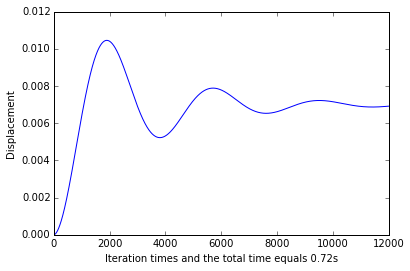

In [26]:
pyplot.plot(sh.transpose());
pyplot.xlabel('Iteration times and the total time equals 0.72s')
pyplot.ylabel('Displacement')

#### Figure 2. The numerical solution of  displacement of y direction of the No. 11 node. 

***The interpretation of the Figure 2:***

**First:**
From the graph above, we can see because the material has the damping properity,  the displacement of the 11th degree of freedom of the structure increases gradually.  And the displacement seems smooth which means the damping properity of material has damped out the energy.

**Second:**
The line of  simulation result calculated by Numerical Method combined with Finite Element Method agrees with the following evidence:

1: the physical phenomenon "if we suddenly sit in a car and the suspension of the car with the 
property damping coefficient(C), we can feel the car vibrate, the amplitude of the vibration will decrease 
gradually and eventually the car will stop vibrating".

2: the actual experiment is from the video(https://www.youtube.com/watch?v=EbkWaNDyFOQ) at 3:34.



##### Now we drop the Damping Coefficiency of the Material Property by time the CsumOk with 0

In [27]:
"""
The following program is to apply the boundary condition to the structure and force the damping property to be zero!
"""

M=MsumOk
C=CsumOk*0 # Now, we force the damping property to be zero!!!
K=KsumOk
#+++++++++++++++++++++++++++++++++++++++++++++++
DOF=36
F=zeros(DOF,1) 

F[35]=1 # Apply the load to the y direction on the node 12
F[32]=1 # Apply the load to the y direction on the node 11
F[11]=1 # Apply the load to the y direction on the node 4
F[14]=1 # Apply the load to the y direction on the node 5

##### The following program is to construct the part:

euqation  (41)\begin{pmatrix} \ 0  \\ M^{-1}F\  \end{pmatrix}  


In [28]:
bup=zeros(36,1)
bdown=(M**-1)*F

b=zeros(72,1)

for k in range(36):
    b[k]=bup[k]

for kk in range(36):
    b[kk+36]=bdown[kk]


#####  The following program is to construct the  Matrix as following:

\begin{align}
\begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix}  \quad \quad\quad(42)
\end{align}

In [29]:
aa=zeros(DOF,DOF)
bb=eye(DOF)
cc=-1*(M** -1)*K
dd=-1*(M** -1)*C

In [30]:
a=zeros(72,72)

for i in range(36):
    for j in range(36):
        a[i,j]=aa[i,j]

for i in range(36):
    for j in range(36):
        a[i,j+36]=bb[i,j]

for i in range(36):
    for j in range(36):
        a[i+36,j]=cc[i,j]

for i in range(36):
    for j in range(36):
        a[i+36,j+36]=dd[i,j]

##### The Following program is the iteration part of the Numerical Method to do the Finite Element Simulation only with Mass Matrix and Stiffness Matrix.



\begin{align}
a=\begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}{C}   \end{pmatrix} \quad \quad \quad \quad\quad\quad \quad\quad(42)
\end{align}

\begin{align}
b= \begin{pmatrix} \ 0  \\ M^{-1}F\  \end{pmatrix} \quad\quad \quad\quad \quad\quad \quad \quad\quad \quad\quad \quad \quad(41)
\end{align}

\begin{align}
\frac{\partial }{\partial t}&
\begin{pmatrix} U \\V \end{pmatrix}
= \begin{pmatrix} \ 0 \ \quad I \\ -M^{-1}K\ \quad-M^{-1}\cdot{(C=0)}   \end{pmatrix}&\begin{pmatrix} U \\V \end{pmatrix}&
+\begin{pmatrix} \ 0  \\ M^{-1}F\   \end{pmatrix} \quad (40)
\end{align}


\begin{align}
\begin{pmatrix} U \\V \end{pmatrix}^{n+1}=\begin{pmatrix} U \\V \end{pmatrix}^{n}+dt\cdot \frac{\partial }{\partial t}&\begin{pmatrix} U \\V \end{pmatrix}^{n} \quad \quad\quad \quad \quad\quad(43)
\end{align}


In [31]:
dt=0.00006;
N=12000

NewU_V_Each=zeros(72,1) #create a space to store all displacements of all the nodes for a single time step
NewU_V_Total=zeros(72,N) #create a space to store all displacements of all the nodes for all time steps

for i in range(N):
    #print("i=",i)
    Newderivative=a * NewU_V_Each + b  # use the equation (40)
   
    NewU_V_Each=NewU_V_Each+dt * Newderivative #use the equation (43)
    
    NewU_V_Total[:,i]=NewU_V_Each # store all displacements of all the nodes information in a matrix 

In [32]:
import matplotlib.pyplot as plt
print(NewU_V_Total.shape)

ssh=NewU_V_Total.row(11)

print(ssh.shape)

(72, 12000)
(1, 12000)


In [33]:
for i in range(399):
    if ssh[i]>ssh[i+1]:
        print("errot")

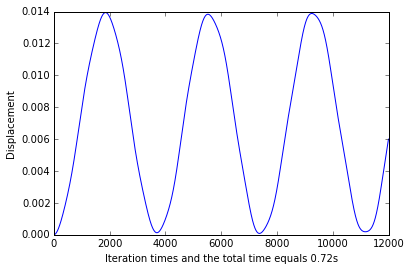

In [34]:
pyplot.plot(ssh.transpose());
pyplot.xlabel('Iteration times and the total time equals 0.72s')
pyplot.ylabel('Displacement')

#### Figure 3. The numerical solution of displacement of y direction of the No. 11 node. 

***The interpretation of  Figure 3:***
    
**First:**From the graph above, we can see because of the material without the damping properity, the displacement of the 11th degree of freedom of the structure vibrate periodically . 


**Second:**As we can see in the graph, the line of  simulation result calculated by Numerical Method combined with Finite Element Method agree with the following evidence:

1: The physical phenomenon "Physical explanation: If we suddenly sit in a car and the suspension of the car without the property damping coefficient(C). Theoretically, the car will not stop vibrating. That means the energy is conserved.".

2: The actual experiment is from the video(https://www.youtube.com/watch?v=-qRYaZP0938) 

## 6. Analytical Solution:

The Duhamel Integral equation [3]:
\begin{equation}
x(t)=\frac{F}{K} \begin{pmatrix}  1- \frac{e^{- \varepsilon \omega t}  cos(\omega_{d}t-\psi)}  {\sqrt{1-\varepsilon^2} \qquad }   \end{pmatrix}\quad \quad\quad(8)
\end{equation}

The Damping ratio [3]:
\begin{equation}
\varepsilon=\frac{C}{2m \omega}\quad \quad\quad(9)
\end{equation}

The Natural Frequence [3]:
\begin{equation}
\omega =\begin{pmatrix}\frac{K}{m} \end{pmatrix}^{0.5}\quad \quad\quad(10)
\end{equation}

The Damping Frequency [3]:
\begin{equation}
\omega_{d} =\omega \begin{pmatrix} 1- \varepsilon_{2}\end{pmatrix}^{0.5}\quad \quad\quad(11)
\end{equation}

#### The code below is to calculate the analytical solution of the structure with Damping Property

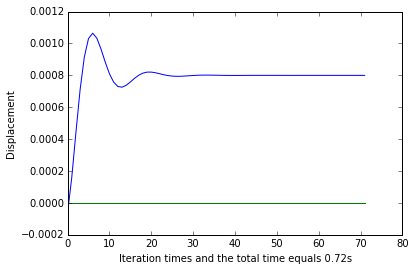

In [67]:
F=4 # the end has four node and each node had load(1N)
possion=0.45
A=1
L=2
young=10000
K=(A/L)*young  #the relation between young's model and stiffness
M=2
C=0.015*K+0.001*M 
w=(K/M)**0.5 #equation (10)
eps=C/(2*M*w) #equation (9)
wd=w*(1-eps**2)**0.5 #equation (11)
c=zeros(72)
dt=0.00006;
N=12000
t=dt*N #total time
for i in range(0,72):
    t=i
    t=t/100 
    x=(F/K)*(1-(2.7**(-eps*w*t))*cos(wd*t)/(1-eps**2)**0.5) #equation (8)
    c[i]=x
    
pyplot.plot(c.transpose()); 
pyplot.xlabel('Iteration times and the total time equals 0.72s')
pyplot.ylabel('Displacement')

#### Figure 4. The analytical solution of  displacement of y direction of the No. 11 node. 

#### The code below is to calculate the analytical solution of the structure without Damping Property

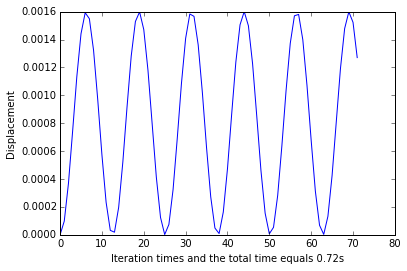

In [65]:
F=4  # the end has four node and each node had load(1N)
possion=0.45
young=10000
K=(1/2)*young
M=2
C=0  # we force the damping cofficiency to be zero!
w=(K/M)**0.5 #equation (10)
eps=C/(2*M*w)#equation (9)
wd=w*(1-eps**2)**0.5 #equation (11)
b=zeros(72)
dt=0.00006;
N=12000
t=dt*N #the total time

for i in range(0,72):
    t=i
    t=t/100 
    x=(F/K)*(1-(2.7**(-eps*w*t))*cos(wd*t)/(1-eps**2)**0.5) #equation9(8)
    b[i]=x
    
pyplot.plot(b.transpose()); 
pyplot.xlabel('Iteration times and the total time equals 0.72s')
pyplot.ylabel('Displacement')

#### Figure 5. The analytical solution of  displacement of y direction of the No. 11 node. 

## 7. Compare the analytical solutions  with numerical solutions in:##

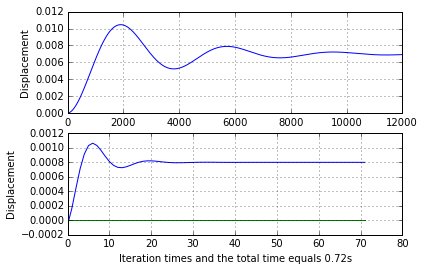

In [73]:
pyplot.subplot(211)
pyplot.grid(True)
pyplot.xlabel('Iteration times and the total time equals 0.72s')
pyplot.ylabel('Displacement')
pyplot.plot(sh.transpose(),  label='The Numerical Solution')

pyplot.subplot(212)
pyplot.grid(True)
pyplot.xlabel('Iteration times and the total time equals 0.72s')
pyplot.ylabel('Displacement')
pyplot.plot(c.transpose(),  label='The Analytical Solution')



#### Figure 6. the structure with the damping property case is plotted for analyzing the difference

**Note:<br/> 1.The numerical solution is the upper one and the analytical solution is at the bottom**
**      <br/>2. Since result of analytical solution is much smaller that of numerical method, it will be better to plot them seperately.**


As you can see in the **Figures above**, the displacement of the y direction of the node 11 in analytical result is much smaller than numerical result in **Figure 2**  for the following reasons:

**1.**Because of the low performance of this computer, only two elements have been modeled by the finite element method. Actually, a large number of elements need to be modeled to get an accurate result. 

**2.**The **small strain theory** was used to derive the finite element equations. 

**3.**The **equation (8)** I used for the numerical solution is for the one dimensional problem and the theory of vibration almost cover the one demensional problem. And the finite element method I used is a three demensional problem. 

## 8. Conclusion: 

**Based on the 3 reasons, the difference between numerical solution and analytical solution can be definitely accepted.**

### References:

[1] Chen, Youping, J D. Lee, and Azim Eskandarian. Meshless Methods in Solid Mechanics. New York, NY: Springer,2006. Internet resource. 

[2] Euler Method.13 November 2015. In Wikipedia. Retrieved 5 December 2015,  from  https://en.wikipedia.org/wiki/Euler_method

[3] Shabana, Ahmed A. Theory of Vibration. New York: Springer-Verlag, 1991. Print. 